In [2]:
import pandas as pd
!pip install plotchecker -U -q
%pylab inline
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [211030, 211023, 211016, 211009, 211002, 210925, 210918, 210911, 210904, 210828, 210821, 210814, 210807,
            210731, 210724, 210717, 210710, 210703]
turnstiles_df = get_data(week_nums)
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/23/2021,00:00:00,REGULAR,7656317,2622663
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/23/2021,04:00:00,REGULAR,7656327,2622669
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/23/2021,08:00:00,REGULAR,7656333,2622695
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/23/2021,12:00:00,REGULAR,7656359,2622761
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/23/2021,16:00:00,REGULAR,7656419,2622816
...,...,...,...,...,...,...,...,...,...,...,...
209825,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,05:00:00,REGULAR,5554,585
209826,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,09:00:00,REGULAR,5554,585
209827,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,13:00:00,REGULAR,5554,585
209828,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/02/2021,17:00:00,REGULAR,5554,585


In [4]:
# 18 weeks data
turnstiles_df.DATE.value_counts().sort_index()

06/26/2021    29965
06/27/2021    29840
06/28/2021    29814
06/29/2021    29843
06/30/2021    29883
              ...  
10/25/2021    29964
10/26/2021    30322
10/27/2021    29936
10/28/2021    29858
10/29/2021    30024
Name: DATE, Length: 126, dtype: int64

In [5]:
# Cleaning column names
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns = [column.lower() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits'],
      dtype='object')

In [6]:
# restricting between brunch time period and adding date_time column
turnstiles_dt= turnstiles_df[turnstiles_df['time'] > '03:00:00']
turnstile_df= turnstiles_dt[turnstiles_dt['time'] < '16:00:00']
turnstiles_df["date_time"] = pd.to_datetime(turnstiles_df.date + " " + turnstiles_df.time, 
                                            format="%m/%d/%Y %H:%M:%S")

In [7]:
## Duplicate entry 
mask = ((turnstiles_df["c/a"] == "A002") &
        (turnstiles_df["unit"] == "R051") & 
        (turnstiles_df["scp"] == "02-00-00") & 
        (turnstiles_df["station"] == "59 ST"))

turnstiles_df[mask].head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/23/2021,00:00:00,REGULAR,7656317,2622663,2021-10-23 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/23/2021,04:00:00,REGULAR,7656327,2622669,2021-10-23 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/23/2021,08:00:00,REGULAR,7656333,2622695,2021-10-23 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/23/2021,12:00:00,REGULAR,7656359,2622761,2021-10-23 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/23/2021,16:00:00,REGULAR,7656419,2622816,2021-10-23 16:00:00


In [8]:
mask = ((turnstiles_df["c/a"] == "R626") & 
(turnstiles_df["unit"] == "R062") & 
(turnstiles_df["scp"] == "00-00-00") & 
(turnstiles_df["station"] == "CROWN HTS-UTICA"))

turnstiles_df[mask].head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
203091,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,10/23/2021,00:00:00,REGULAR,16117351,3564579,2021-10-23 00:00:00
203092,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,10/23/2021,04:00:00,REGULAR,16117354,3564599,2021-10-23 04:00:00
203093,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,10/23/2021,08:00:00,REGULAR,16117406,3564616,2021-10-23 08:00:00
203094,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,10/23/2021,12:00:00,REGULAR,16117558,3564649,2021-10-23 12:00:00
203095,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,10/23/2021,16:00:00,REGULAR,16117753,3564704,2021-10-23 16:00:00


In [41]:
turnstiles_df.desc.value_counts()

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'date_time'],
      dtype='object')

In [10]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["c/a", "unit", "scp", "station", "date_time"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["c/a", "unit", "scp", "station", "date_time"], inplace=True)

In [11]:
turnstiles_df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
209883,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,21:00:00,REGULAR,5554,681,2021-10-29 21:00:00
209882,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,17:00:00,REGULAR,5554,681,2021-10-29 17:00:00
209881,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,13:00:00,REGULAR,5554,680,2021-10-29 13:00:00
209880,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,09:00:00,REGULAR,5554,680,2021-10-29 09:00:00
209879,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,10/29/2021,05:00:00,REGULAR,5554,680,2021-10-29 05:00:00


In [12]:
# unique check
(turnstiles_df
 .groupby(["c/a", "unit", "scp", "station", "date_time"])
 .entries.count()
 .reset_index()
 .sort_values("entries", ascending=False))


,c/a,unit,scp,station,date_time,entries
0,A002,R051,02-00-00,59 ST,2021-06-26 00:00:00,1
2516059,R139,R031,04-00-02,34 ST-PENN STA,2021-09-14 00:00:00,1
2516061,R139,R031,04-00-02,34 ST-PENN STA,2021-09-14 08:00:00,1
2516062,R139,R031,04-00-02,34 ST-PENN STA,2021-09-14 12:00:00,1
2516063,R139,R031,04-00-02,34 ST-PENN STA,2021-09-14 16:00:00,1
...,...,...,...,...,...,...
1258037,N128,R200,00-00-03,EUCLID AV,2021-07-15 08:00:00,1
1258038,N128,R200,00-00-03,EUCLID AV,2021-07-15 12:00:00,1
1258039,N128,R200,00-00-03,EUCLID AV,2021-07-15 16:00:00,1
1258040,N128,R200,00-00-03,EUCLID AV,2021-07-15 20:00:00,1


In [13]:
# Making two dataframes for entry and exits
entry = turnstiles_df.copy()
exit = turnstiles_df.copy()

entry = turnstiles_df.drop(["exits", "desc"], axis=1, errors="ignore")
exit = turnstiles_df.drop(["entries", "desc"], axis=1, errors="ignore")

In [14]:
# Start getting data for entry
# getting daily mamximum entries
entry_daily = (entry.groupby(["c/a", "unit", "scp", "station", "date"],as_index=False).entries.first())
entry_daily.head()

,c/a,unit,scp,station,date,entries
0,A002,R051,02-00-00,59 ST,06/26/2021,7593116
1,A002,R051,02-00-00,59 ST,06/27/2021,7593427
2,A002,R051,02-00-00,59 ST,06/28/2021,7593979
3,A002,R051,02-00-00,59 ST,06/29/2021,7594528
4,A002,R051,02-00-00,59 ST,06/30/2021,7595154


In [15]:
#getting daily entry by making previous date and entries

entry_daily[["prev_date", "prev_entries"]] = (entry_daily
                                                       .groupby(["c/a", "unit", "scp", "station"])["date", "entries"]
                                                       .apply(lambda grp: grp.shift(1)))
entry_daily.dropna(subset=["prev_date"], axis=0, inplace=True)
entry_daily.head()

<ipython-input-15-be6a9ee27928>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  entry_daily[["prev_date", "prev_entries"]] = (entry_daily


,c/a,unit,scp,station,date,entries,prev_date,prev_entries
1,A002,R051,02-00-00,59 ST,06/27/2021,7593427,06/26/2021,7593116.0
2,A002,R051,02-00-00,59 ST,06/28/2021,7593979,06/27/2021,7593427.0
3,A002,R051,02-00-00,59 ST,06/29/2021,7594528,06/28/2021,7593979.0
4,A002,R051,02-00-00,59 ST,06/30/2021,7595154,06/29/2021,7594528.0
5,A002,R051,02-00-00,59 ST,07/01/2021,7595703,06/30/2021,7595154.0


In [16]:
# Calculating dialy entry with function
def get_daily_counts(row, max_counter):
    counter = row["entries"] - row["prev_entries"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["entries"], row["prev_entries"])
        counter = min(row["entries"], row["prev_entries"])
    if counter > max_counter:
        return 0
    return counter

entry_daily["daily_entries"] = entry_daily.apply(get_daily_counts, axis=1, max_counter=1000000)
entry_daily.head()

50 5264647.0
353 8049630.0
167790157 702266.0
63 9631506.0
310 5609562.0
35 9768753.0
33565227 188178.0
48 8724126.0
327710 1560335855.0
117453575 459314.0
511 3272795.0
5946 4298704.0
0 117440512.0
67136025 290390.0
1979658580 9048026.0
587209538 2350346.0
687930029 2704968.0
369104686 1458906.0
1966428 196464.0
327975 7577027.0
83942360 378941.0
168 9321838.0
67109632 14.0
327682 67109640.0
15 67109632.0
36 1198448.0
263 557914756.0
46 5405351.0
200 705357551.0
101246809 466360.0
16777220 1037157.0
6 16034831.0
240 67470015.0
2151581 1043925813.0
386 6213955.0
37 1950780.0
443 15689395.0
2031760 4435692.0
1084 2958634.0
131 1617704.0
241 2818347.0
8 1255797.0
5 11123659.0
256 3153907.0
126 3102523.0
553 3506117.0
50331648 262144.0
19 2570919.0
50362839 251769.0
114 1953264.0
169 4788322.0
82 6249985.0
67 1040931923.0
118 909043641.0
197214 1890967.0
716 3145979.0
285 3530461.0
35 10737302.0
201331968 798740.0
154 5768873.0
377 3232067.0
1089962154 146746170.0
146744159 1089940461.0
3

,c/a,unit,scp,station,date,entries,prev_date,prev_entries,daily_entries
1,A002,R051,02-00-00,59 ST,06/27/2021,7593427,06/26/2021,7593116.0,311.0
2,A002,R051,02-00-00,59 ST,06/28/2021,7593979,06/27/2021,7593427.0,552.0
3,A002,R051,02-00-00,59 ST,06/29/2021,7594528,06/28/2021,7593979.0,549.0
4,A002,R051,02-00-00,59 ST,06/30/2021,7595154,06/29/2021,7594528.0,626.0
5,A002,R051,02-00-00,59 ST,07/01/2021,7595703,06/30/2021,7595154.0,549.0


In [17]:
#finding station that has the most entries

top5_entry_station = (entry_daily.groupby(['station'], as_index = False).daily_entries.sum())
top5_entry_station = top5_entry_station.sort_values('daily_entries', ascending = False)

top5_entry_station.head(5)

,station,daily_entries
61,34 ST-PENN STA,6904849.0
259,JUNCTION BLVD,6056614.0
315,PATH NEW WTC,5645263.0
226,FULTON ST,5184331.0
110,86 ST,4770242.0


Text(0.5, 1.0, 'Top 5 entry stations')

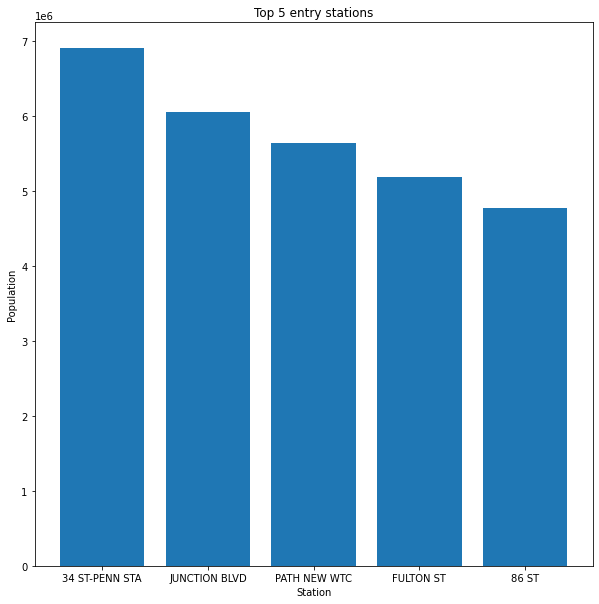

In [25]:
# top 5 entry station graph
plt.figure(figsize=(10,10))
plt.bar('station', 'daily_entries', data = top5_entry_station.head(5))
plt.xlabel('Station')
plt.ylabel('Population')
plt.title("Top 5 entry stations")

In [19]:
# Start getting data for exit
# getting daily mamximum entries
exit_daily = (exit.groupby(["c/a", "unit", "scp", "station", "date"],as_index=False).exits.first())
exit_daily.head()

,c/a,unit,scp,station,date,exits
0,A002,R051,02-00-00,59 ST,06/26/2021,2595809
1,A002,R051,02-00-00,59 ST,06/27/2021,2595922
2,A002,R051,02-00-00,59 ST,06/28/2021,2596145
3,A002,R051,02-00-00,59 ST,06/29/2021,2596417
4,A002,R051,02-00-00,59 ST,06/30/2021,2596679


In [20]:
#getting daily exit by making previous date and exits

exit_daily[["prev_date", "prev_exits"]] = (exit_daily
                                                       .groupby(["c/a", "unit", "scp", "station"])["date", "exits"]
                                                       .apply(lambda grp: grp.shift(1)))
exit_daily.dropna(subset=["prev_date"], axis=0, inplace=True)
exit_daily.head()

<ipython-input-20-0fcff9cc0570>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  exit_daily[["prev_date", "prev_exits"]] = (exit_daily


,c/a,unit,scp,station,date,exits,prev_date,prev_exits
1,A002,R051,02-00-00,59 ST,06/27/2021,2595922,06/26/2021,2595809.0
2,A002,R051,02-00-00,59 ST,06/28/2021,2596145,06/27/2021,2595922.0
3,A002,R051,02-00-00,59 ST,06/29/2021,2596417,06/28/2021,2596145.0
4,A002,R051,02-00-00,59 ST,06/30/2021,2596679,06/29/2021,2596417.0
5,A002,R051,02-00-00,59 ST,07/01/2021,2596932,06/30/2021,2596679.0


In [24]:
# Calculating dialy exit with function
def get_daily_counts_exit(row, max_counter):
    counter = row["exits"] - row["prev_exits"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["exits"], row["prev_exits"])
        counter = min(row["exits"], row["prev_exits"])
    if counter > max_counter:
        return 0
    return counter

exit_daily["daily_exits"] = exit_daily.apply(get_daily_counts_exit, axis=1, max_counter=1000000)
exit_daily.tail()

85 5980618.0
165 2357391.0
268473848 1083083.0
75 1318622.0
633 2245979.0
1 1076665.0
100678103 411664.0
65 8512839.0
6 1056988739.0
602 1025567.0
713 2544401.0
306 1150397.0
2133796536 55608.0
55645 2133796536.0
16818895 129276.0
587250745 2342726.0
151013878 613555.0
151023648 620734.0
771803613 3039094.0
106 2004675.0
60 3415188.0
79 1502382.0
429 186124399.0
50 1851686.0
465 705468481.0
226 7303975.0
1039140 1009318796.0
1624 2136659.0
1179 3095180.0
436 8944151.0
152 3432817.0
160 1239738.0
1000 1067752.0
0 1240819.0
40 2888888.0
67 2974173.0
8 14324224.0
397 3150772.0
952 1005893.0
33554435 94365.0
40 1990628.0
604001837 2369108.0
1265 1895949.0
132 2607848.0
400 16054786.0
225 734707935.0
46 1875745913.0
750 1958100.0
584 1330258.0
139 1758593.0
74 1324601.0
995 1324365.0
2013958193 175636351.0
192461686 2013993657.0
65622 34097662.0
891 7766949.0
1986 1058913.0
32 5192355.0
192 2494263.0
377 2365001.0
1639186158 1040976.0
316001 36140449.0
36151067 316049.0
812992 8118107.0
812

,c/a,unit,scp,station,date,exits,prev_date,prev_exits,daily_exits
629748,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/25/2021,659,10/24/2021,659.0,0.0
629749,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/26/2021,662,10/25/2021,659.0,3.0
629750,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/27/2021,666,10/26/2021,662.0,4.0
629751,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/28/2021,679,10/27/2021,666.0,13.0
629752,TRAM2,R469,00-05-01,RIT-ROOSEVELT,10/29/2021,681,10/28/2021,679.0,2.0


In [22]:
#finding station that has the most exits

top5_exit_station = (exit_daily.groupby(['station'], as_index = False).daily_exits.sum())
top5_exit_station = top5_exit_station.sort_values('daily_exits', ascending = False)

top5_exit_station.head(5)

,station,daily_exits
61,34 ST-PENN STA,9357674.0
259,JUNCTION BLVD,7645097.0
226,FULTON ST,6718823.0
14,14 ST-UNION SQ,6363556.0
233,GRD CNTRL-42 ST,6304887.0


Text(0.5, 1.0, 'top 5 exit stations')

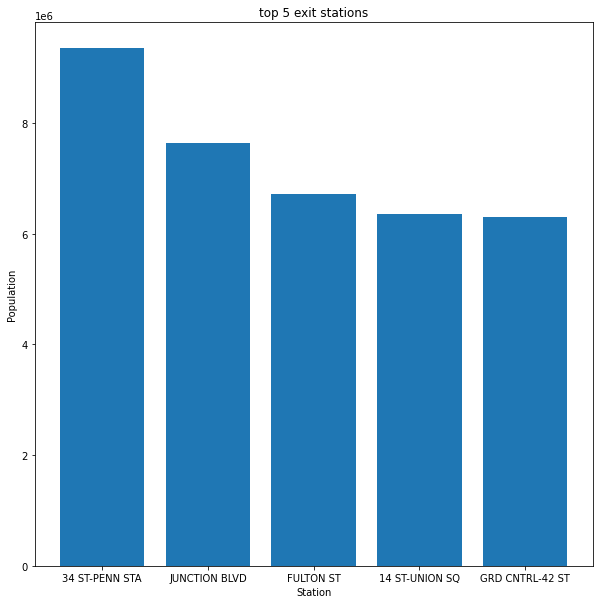

In [27]:
# top 5 exit station graph

plt.figure(figsize=(10,10))
plt.bar('station', 'daily_exits', data = top5_exit_station.head(5))
plt.xlabel('Station')
plt.ylabel('Population')
plt.title("top 5 exit stations")


In [37]:
top5_exit_station['sum_entry_exit'] = top5_exit_station.daily_exits + top5_entry_station.daily_entries
top5_exit_station = top5_exit_station.sort_values('sum_entry_exit', ascending = False)
top5_exit_station = top5_exit_station.drop(["daily_exits", "desc"], axis=1, errors="ignore")
top5_exit_station.head(5)

AttributeError: 'DataFrame' object has no attribute 'daily_exits'

In [40]:
top5_exit_station.head(5)

,station,sum_entry_exit
61,34 ST-PENN STA,16262523.0
259,JUNCTION BLVD,13701711.0
226,FULTON ST,11903154.0
110,86 ST,10811795.0
315,PATH NEW WTC,10695411.0


Text(0.5, 1.0, 'Top 5 entry-exit stations')

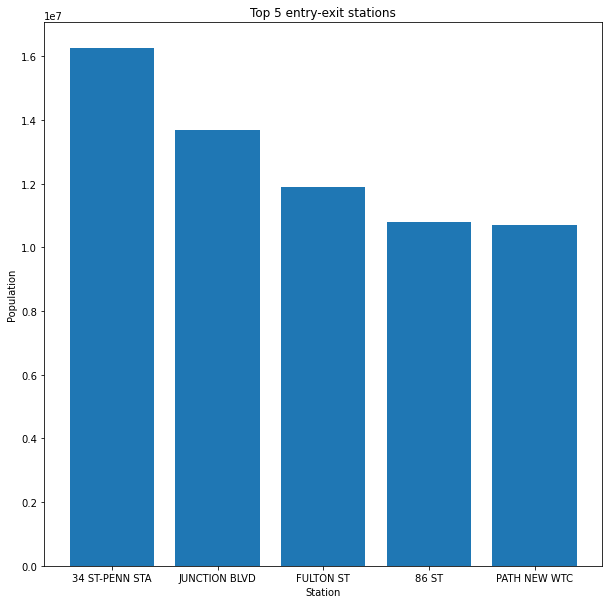

In [39]:
plt.figure(figsize=(10,10))
plt.bar('station', 'sum_entry_exit', data = top5_exit_station.head(5))
plt.xlabel('Station')
plt.ylabel('Population')
plt.title('Top 5 entry-exit stations')